# Исходные данные:
Данные об оттоке клиентов некоторого банка с сайта kaggle: https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers


In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [2]:
# Загружаем данные
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AV_Lesnykh_Skillfactory/churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Первичный анализ данных

In [3]:
# Размерность датасета
df.shape

(10000, 14)

### Столбцы таблицы:

RowNumber — номер строки таблицы;<br>
CustomerId — идентификатор клиента;<br>
Surname — фамилия клиента;<br>
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);<br>
Geography — страна клиента (банк международный);<br>
Gender — пол клиента;<br>
Age — возраст клиента;<br>
Tenure — сколько лет клиент пользуется услугами банка;<br>
Balance — баланс на счетах клиента в банке;<br>
NumOfProducts — количество услуг банка, которые приобрёл клиент;<br>
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);<br>
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);<br>
EstimatedSalary — предполагаемая заработная плата клиента;<br>
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент);<br>

In [4]:
# Удалим столбец RowNumber(номер строки таблицы), т.к это лишняя информация
df.drop(columns=['RowNumber'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [6]:
# Проверка отсутствующих значений
pd.isna(df).sum()[pd.isna(df).sum() > 0]

Series([], dtype: int64)

In [7]:
# Сводная статистика по датасету
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Задание:

**Задание №9.1:**<br>
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.<br>

In [8]:
# Подсчет количества уникальных значений в столбце Exited (1 — ушедший клиент, 0 — лояльный клиент)
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

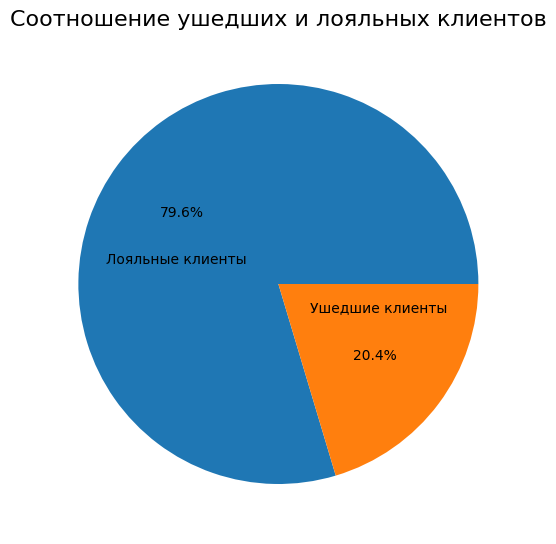

In [10]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    df['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
    labeldistance = 0.2,
);
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)

**Вывод:**<br>
Банк потерял более 20.4% клиентов.

**Задание №9.2:**<br>
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.<br>

In [11]:
user_balance = df[df['Balance']>2500] # отфильтруем клиентов банка с балансом больше 2500 долларов

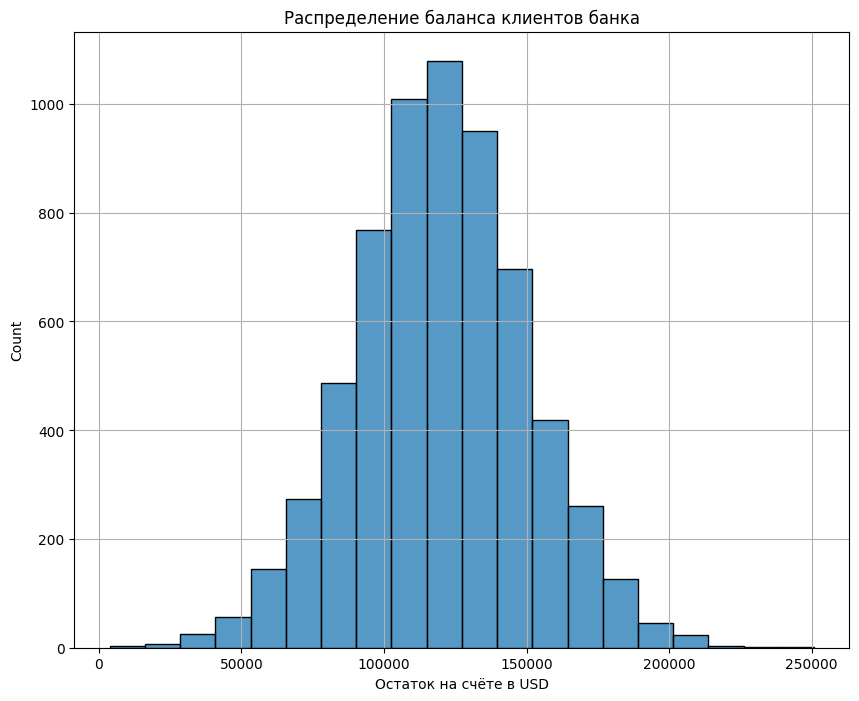

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.histplot(
    data=user_balance,
    x='Balance',
    bins=20,
    kde=False,
    ax=ax
)
ax.set_title('Распределение баланса клиентов банка')
ax.set_xlabel('Остаток на счёте в USD')
ax.grid()

In [15]:
print('Средний остаток на счёте клиентов: {} USD'.format(round(user_balance['Balance'].mean())))

Средний остаток на счёте клиентов: 119827 USD


**Вывод:**<br>
Из графика можно сделать вывод, что средний остаток на счетах клиентов банка равен 120 000 USD и большинство клиентов банка имеет на счету более 100 000 USD.

**Задание №9.3:**<br>
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.<br>

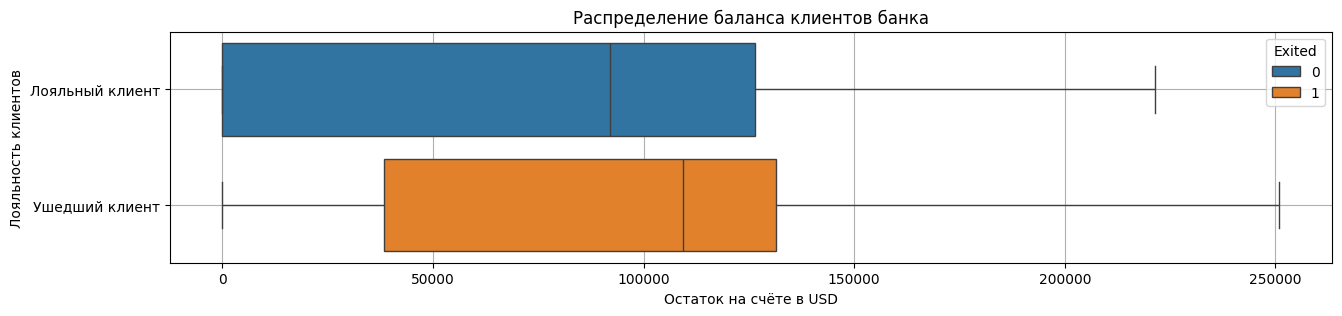

In [20]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=df,
    y='Exited', # где (1 — ушедший клиент, 0 — лояльный клиент)
    x='Balance',
    orient='h',
    width=0.8,
    hue='Exited'
)

boxplot.set_title('Распределение баланса клиентов банка')
boxplot.set_xlabel('Остаток на счёте в USD')
boxplot.set_ylabel('Лояльность клиентов')
boxplot.set_yticks([0, 1])
boxplot.set_yticklabels(['Лояльный клиент', 'Ушедший клиент']) # настройка меток оси y
boxplot.grid()

**Вывод:**<br>
Из сравнения остатков на счетах лояльных и ушедших клиентов можно сделать вывод, что остатки по счетам клиентов, которые ушли, выше остатков лояльных клиентов.
 Причины ухода могли быть следующими:
- низкой инвестиционной привлекательностью банка (низкие процентные ставки по вкладам);
- высокие ставки на кредитование;
- ограничение снятия наличных через банкомат или терминал и т.д.

**Задание №9.4:**<br>
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?<br>

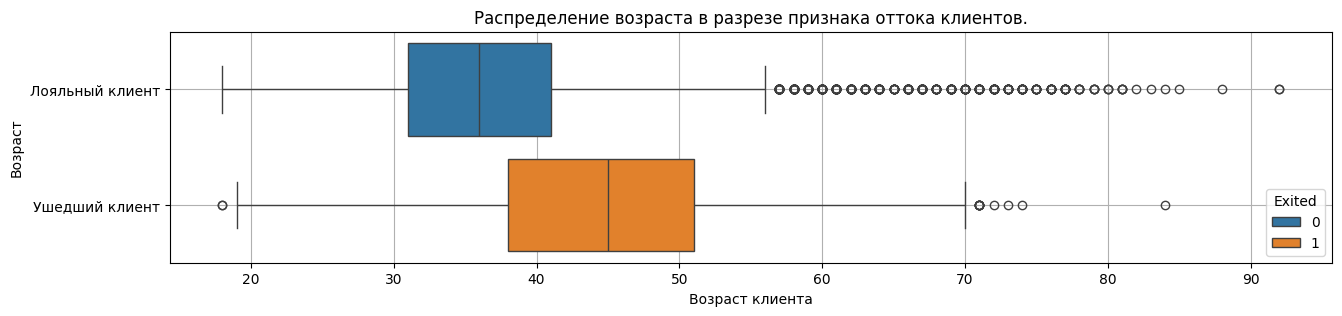

In [24]:
fig = plt.figure(figsize=(15, 3))
boxplot = sns.boxplot(
    data=df,
    y = 'Exited', # где (1 — ушедший клиент, 0 — лояльный клиент)
    x = 'Age',
    orient='h',
    width=0.8,
    hue='Exited'
)
boxplot.set_title('Распределение возраста в разрезе признака оттока клиентов.');
boxplot.set_xlabel('Возраст клиента');
boxplot.set_ylabel('Возраст')
boxplot.set_yticks([0, 1])
boxplot.set_yticklabels(['Лояльный клиент', 'Ушедший клиент']) # настройка меток оси y
boxplot.grid()

**Вывод:**<br>
Согласно графику можно сделать вывод, что возрастная категория ушедших клиентов возрастом от 38 до 53 лет. Возрастная катерогия лояльных клиентов от 32 до 42 лет. Большое количество выбросов среди лояльных клиентов в диапазоне от 56 до 93 лет может свидетельствовать, что это невостребованные вклады умерших людей, права на которые не заявлены наследниками.<br>
Банку необходимо разработать меры для повышения инвестиционной привлекательности среди клиентов в возрасте от 38 до 53 лет.

**Задание №9.5:**<br>
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.<br>

Text(0, 0.5, 'Предполагаемая зарплата')

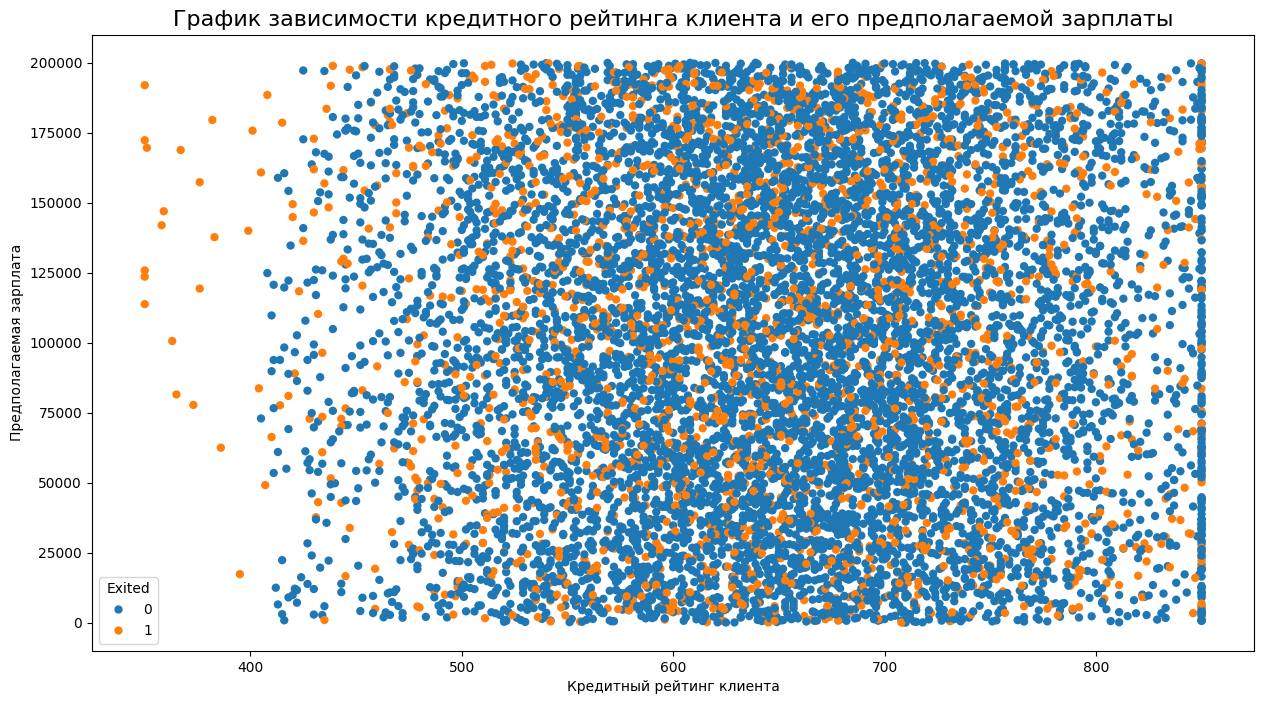

In [31]:
fig, axes = plt.subplots(figsize=(15, 8))

sns.scatterplot(x="CreditScore",
    y="EstimatedSalary",
    hue="Exited",
    sizes=(1, 8),
    linewidth=0,
    data=df,
    ax=axes
)

axes.set_title('График зависимости кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
axes.set_xlabel('Кредитный рейтинг клиента')
axes.set_ylabel('Предполагаемая зарплата')

**Вывод:**<br>
Из графика видно, что нет ярко выраженной взаимосвязи кредитного рейтинга и предполагаемой зарплаты.

**Задание №9.6:**<br>
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.<br>

Text(0.5, 1.0, 'Соотношение ушедших и лояльных \n клиентов: женщины')

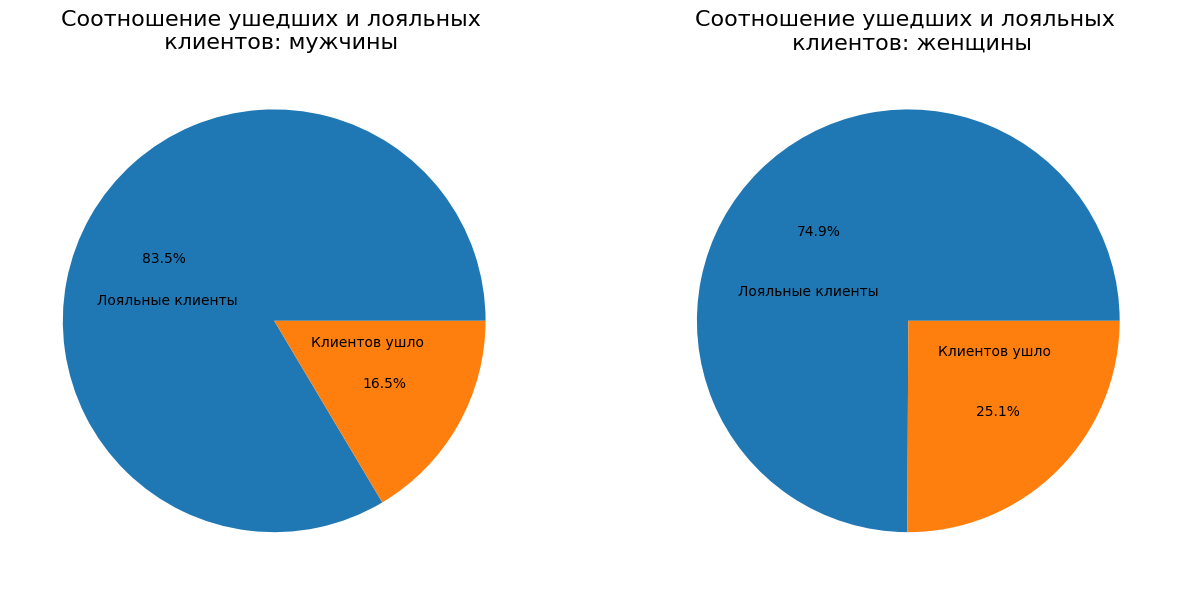

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

axes[0].pie(
    df[df['Gender']=='Male']['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
);
axes[0].set_title('Соотношение ушедших и лояльных \n  клиентов: мужчины', fontsize=16)

axes[1].pie(
    df[df['Gender']=='Female']['Exited'].value_counts(),
    labels=['Лояльные клиенты', 'Клиентов ушло'],
    autopct='%.1f%%',
    labeldistance = 0.2,
);
axes[1].set_title('Соотношение ушедших и лояльных \n клиентов: женщины', fontsize=16)

**Вывод:**<br>
Как видно из графиков, среди ушедших клиентов банка женщины преобладают по сравнению с мужчинами. А среди лояльных клиентов банка мужчины наоборот преобладают по сравнению с женщинами.

**Задание №9.7:**<br>
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.<br>

In [40]:
# Сгруппируем данные в датасете df по уникальным комбинациям значений в столбцах NumOfProducts и Exited
grouped_row = df.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()

In [51]:
for i in range(len(grouped_row['Exited'])):
    if grouped_row['Exited'][i] == 1:
        grouped_row['Exited'][i] = 'Клиент ушёл'
    else:
        grouped_row['Exited'][i] = 'Лояльный клиент'

In [53]:
fig = px.bar(
    data_frame=grouped_row,
    x="NumOfProducts",
    y="CustomerId",
    color='Exited',
    orientation='v',
    height=500,
    width=1000,
    title='Зависимость оттока клиентов от числа приобретенных услуг',
    barmode = 'group',
)
fig.show()

**Вывод:**<br>
Из графика видно, что большинство ушедших клиентов банка приобрели только одну услугу, в то время как у значительной части лояльных клиентов банка имеется две услуги. Возможной причиной ухода после приобретения одной услуги может быть недостаточное качество предоставляемой услуги или неудовлетворенность клиента остальными предложениями банка.

**Задание №9.8:**<br>
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?<br>

In [57]:
# Сгруппируем данные из датасета df по столбцу 'IsActiveMember' и вычислим среднее значение столбца 'Exited' для каждой группы
active_category= df.groupby('IsActiveMember', as_index=False)['Exited'].mean()
active_category['IsActiveMember'] = ['Неактивные клиенты', 'Активные клиенты']

Text(0, 0.5, 'Процент ушедших')

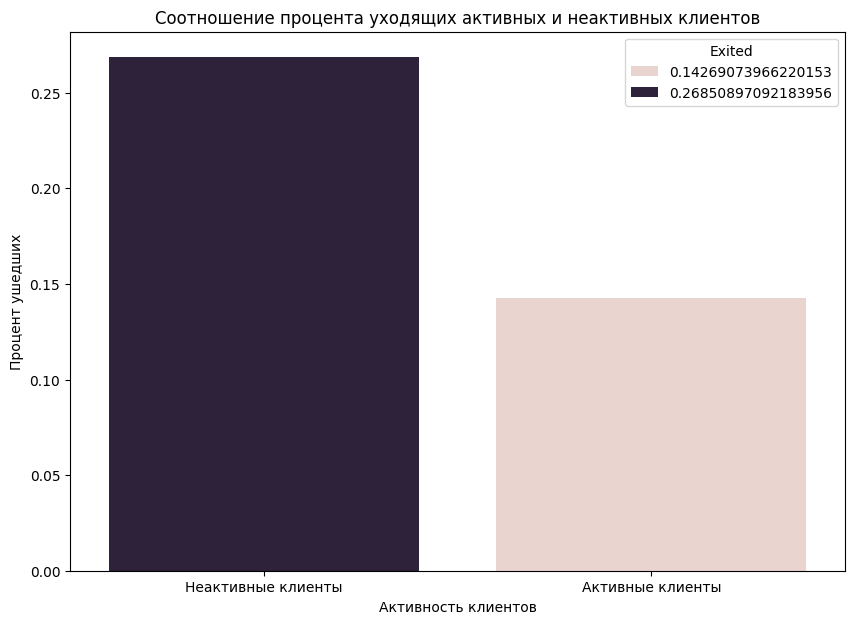

In [59]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data = active_category,
    x = 'IsActiveMember',
    y = 'Exited',
    hue='Exited',
)
barplot.set_title('Соотношение процента уходящих активных и неактивных клиентов');
barplot.set_xlabel('Активность клиентов')
barplot.set_ylabel('Процент ушедших')

**Вывод:**<br>
Как видно из графика доля ушедших неактивных клиентов выше в 2 раза, чем активных клиентов. Банку необходимо создать систему мотивации клиентов.

**Задание №9.9:**<br>
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.<br>

In [65]:
loyatlity_chor=df.groupby(['Geography'], as_index=False)['Exited'].mean() # находим долю ушедших клиентов по каждой стране

fig = px.choropleth(
    data_frame=loyatlity_chor,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Распределение долей ушедших клиентов банка на карте',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

**Вывод:**<br>
Максимальная доля ушедших клиентов из Германии. Возможные причины ухода клиентов банка из этой страны - низкая инвестиционная привлекательность банка или качество предоставляемых услуг.

**Задание №9.10:**<br>
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.<br>

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Exited                                                    \
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

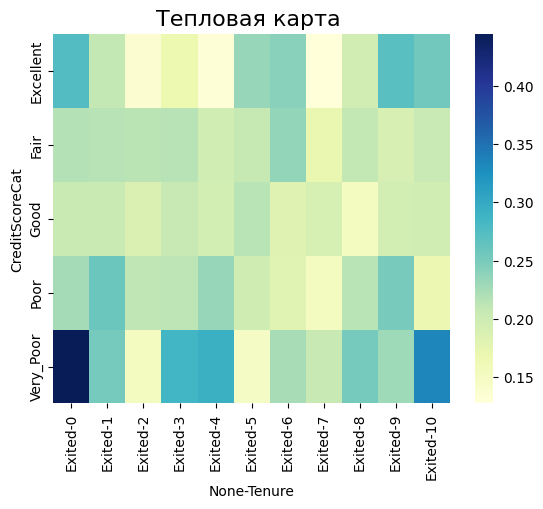

In [66]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

df['CreditScoreCat']=df['CreditScore'].apply(get_credit_score_cat) #создаём признак CreditScoreCat — категории кредитного рейтинга
df['CreditScoreCat'] = df['CreditScoreCat'].astype('category') # меняем тип столбца
cat_score=df.groupby(['CreditScoreCat','Tenure'])[['Exited']].mean().unstack() # создаем сводную таблицу
display(cat_score)
heatmap = sns.heatmap(data=cat_score, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ', fontsize=16);

**Вывод:**<br>
Как видно из графика, чаще всего уходят клиенты банка с очень низким кредитным рейтингом.